### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data

# lapatinib
conc_l, pop, g2, g1, g2_0, g1_0 = setup_data("lapatinib");


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


### Estimate 

In [2]:
# initial guess
initial_guess  = [0.02798, 0.025502, 15.3481, 15.2881, 0.001, 0.001]

# bounds 
lower_bnd = [-6.0, -6.0, 1.0, 1.0, -10.0, -10.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]

# max number of steps
maxSteps = 10000
parameters = zeros(6,8)
for j in 1:8
    println("#################### trial number $j #########################")
    best_fit, parameters[:,j] = optimization(g1, g2, g1_0, g2_0, initial_guess, j, lower_bnd, upper_bnd, maxSteps)
    println(best_fit)
end

#################### trial number 1 #########################
308.26293880403574
#################### trial number 2 #########################
406.51650249819943
#################### trial number 3 #########################
268.4000119744203
#################### trial number 4 #########################
449.6694619407263
#################### trial number 5 #########################
558.9683386973613
#################### trial number 6 #########################
97.01366781075083
#################### trial number 7 #########################
155.74902749804656
#################### trial number 8 #########################
231.45208114149634


### Plot

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29


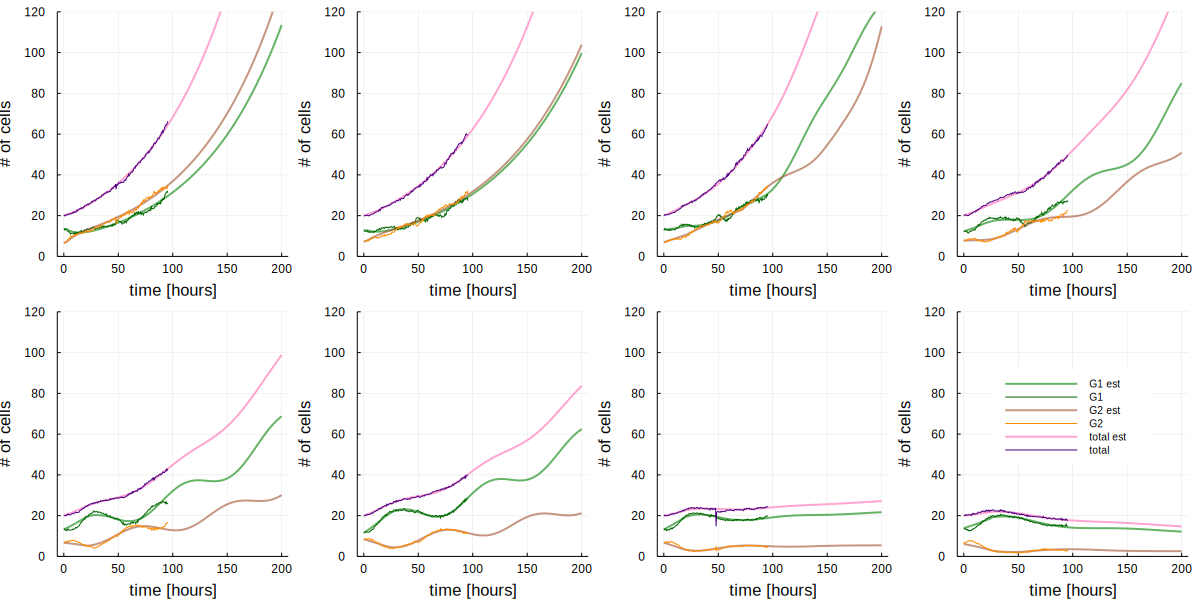

In [3]:
plot_all(parameters, pop, g2, g1, g2_0, g1_0)

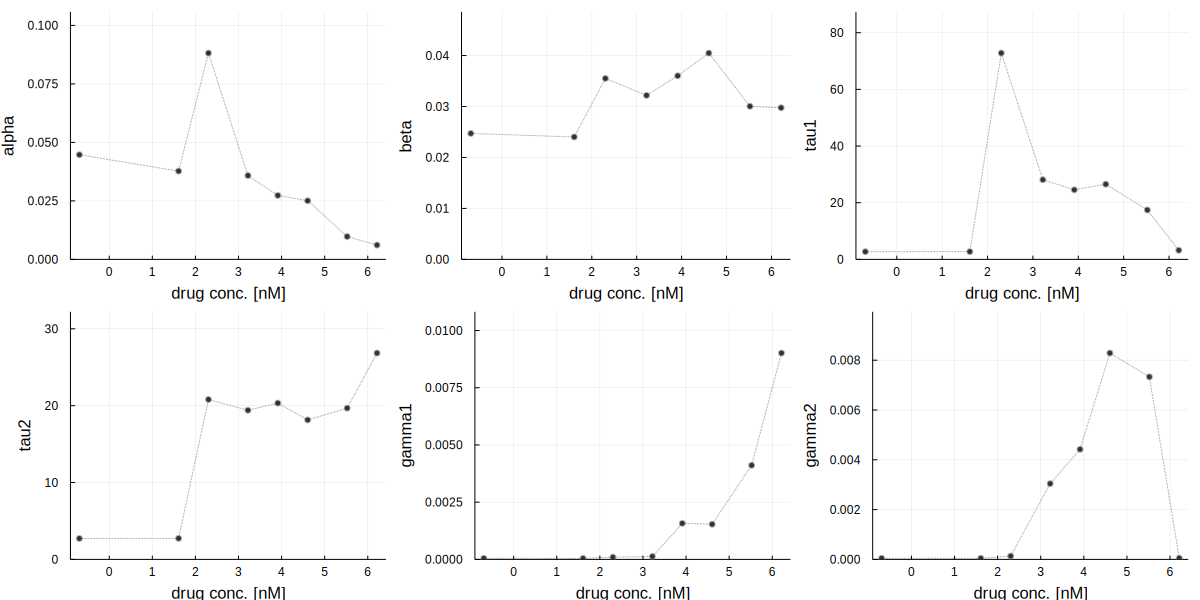

In [4]:
plot_parameters(conc_l, parameters)